In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import tensorflow_datasets as tfds

tf.executing_eagerly()

True

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
print(tf.config.experimental.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]


In [4]:
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


http://yann.lecun.com/exdb/mnist/

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_set, test_set = dataset['train'], dataset['test']

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples:',num_train_examples)
print('Number of test examples:',num_test_examples)

Number of training examples: 60000
Number of test examples: 10000


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [8]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [9]:
train_set = train_set.map(normalize)
test_set = test_set.map(normalize)

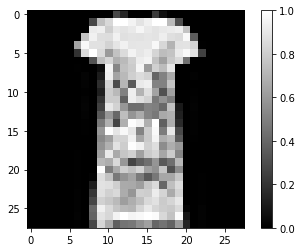

In [10]:
for training_example in train_set.take(1):
    img = training_example[0]
    img = img.numpy().reshape(28,28)
    
    plt.imshow(img, cmap=plt.cm.gray)
    plt.colorbar()

In [11]:
L = [
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]
model = tf.keras.Sequential(L)

In [12]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 32
train_set = train_set.repeat().shuffle(num_train_examples).batch(batch_size)
test_set = test_set.batch(batch_size)
model.fit(train_set, epochs=5, steps_per_epoch=math.ceil(num_train_examples/batch_size))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4987 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3397 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3080 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.8926


In [18]:
test_loss, test_accuracy = model.evaluate(test_set, steps=math.ceil(num_test_examples/32))
print("Test accuracy: " + str(test_accuracy*100) + "%")

313/313 [==============================] - 1s 3ms/step - loss: 0.3604 - accuracy: 0.8691
Test accuracy: 86.90999746322632%
